# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1064.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.74e-42
Time:                        17:06:17   Log-Likelihood:                 4.4594
No. Observations:                  50   AIC:                           -0.9188
Df Residuals:                      46   BIC:                             6.729
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9488      0.079     62.924      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.40969647  4.94512482  5.43363276  5.84201378  6.14904543  6.34897612
  6.45247004  6.48485512  6.48196167  6.48423561  6.53009328  6.64960978
  6.85957769  7.16074809  7.53770719  7.96140876  8.39394633  8.79478112
  9.12740246  9.36532639  9.49644688  9.52502482  9.470988    9.36665699
  9.25143498  9.16533394  9.14240078  9.20512354  9.36073664  9.60003232
  9.89887343 10.22215909 10.52959169 10.78229764 10.94921423 11.01219312
 10.96898204 10.83359489 10.63400924 10.40756972 10.19485242 10.03299831
  9.94961111  9.95822208 10.05606687 10.22453968 10.43225015 10.64018073
 10.80809711 10.90115863]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.87960032 10.69855331 10.38191219  9.98412967  9.57688468  9.23153285
  9.00163619  8.90984922  8.94237236  9.05233055]


## Plot comparison

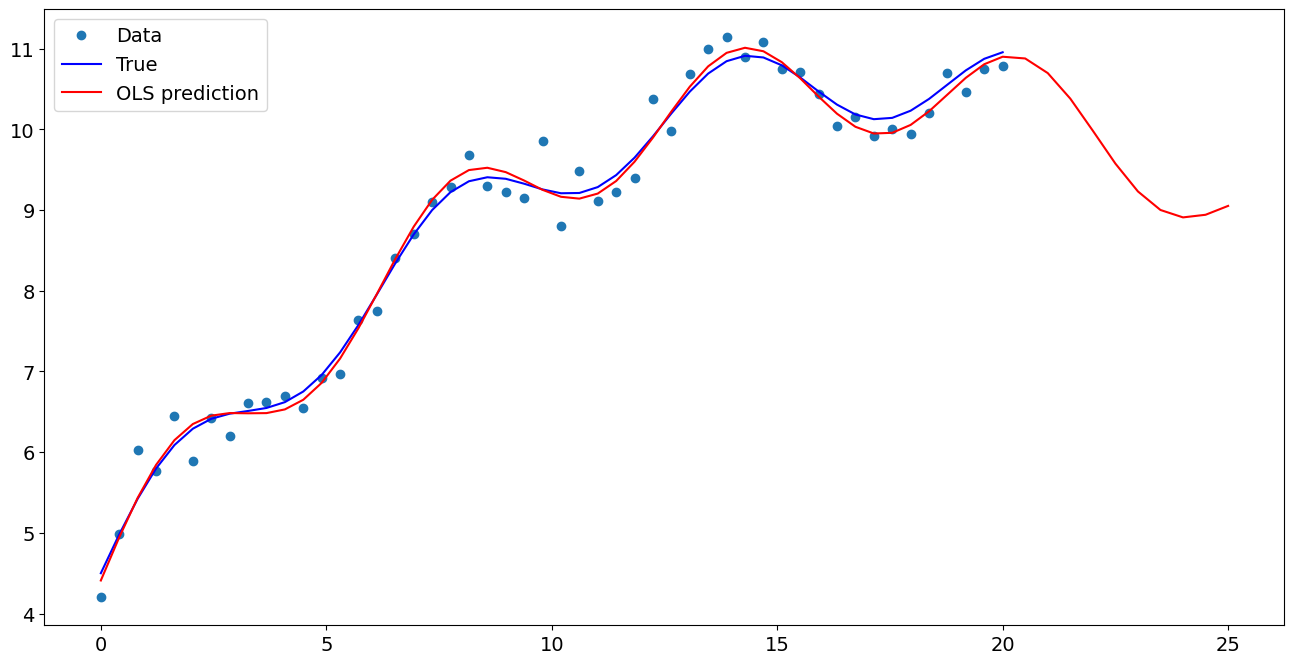

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.948842
x1                  0.512418
np.sin(x1)          0.609303
I((x1 - 5) ** 2)   -0.021566
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.879600
1    10.698553
2    10.381912
3     9.984130
4     9.576885
5     9.231533
6     9.001636
7     8.909849
8     8.942372
9     9.052331
dtype: float64